In [4]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# Modulo de optimización de scipy
from scipy import optimize

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [6]:
#Carga de dataset
data = pd.read_csv('framingham.csv')

# Importar libreria para dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [8]:
#llenar datos vacios
columnas_especificas = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [10]:
# Division de dataset en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [11]:
# informacion de los nuevos datasets
train_data.info()
test_data.info()

#exportar nuevos datasets
train_data.to_csv("train.csv", index=False)
test_data.to_csv("test.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 3252 to 860
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   currentSmoker    3390 non-null   int64  
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 450.2 KB
<class 'pandas.c

In [12]:
#Carga de dataset
data = pd.read_csv('train.csv')

In [13]:
# Lectura de Datos
X = data.iloc[:, :15]
y = data.iloc[:, 15]
m = y.size

print(X)
print('*'*25)
print(y)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   40        4.0              1        30.0     0.0   
1        0   57        2.0              0         0.0     0.0   
2        0   47        1.0              0         0.0     0.0   
3        1   41        2.0              1        30.0     0.0   
4        0   64        1.0              0         0.0     0.0   
...    ...  ...        ...            ...         ...     ...   
3385     0   36        1.0              1         5.0     0.0   
3386     0   57        3.0              1        15.0     0.0   
3387     0   60        2.0              0         0.0     0.0   
3388     1   39        2.0              1        10.0     0.0   
3389     0   35        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    205.0  131.0   81.0  23.74   
1                   0             1         0    250.0  152.5

In [14]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [15]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   40        4.0              1        30.0     0.0   
1        0   57        2.0              0         0.0     0.0   
2        0   47        1.0              0         0.0     0.0   
3        1   41        2.0              1        30.0     0.0   
4        0   64        1.0              0         0.0     0.0   
...    ...  ...        ...            ...         ...     ...   
3385     0   36        1.0              1         5.0     0.0   
3386     0   57        3.0              1        15.0     0.0   
3387     0   60        2.0              0         0.0     0.0   
3388     1   39        2.0              1        10.0     0.0   
3389     0   35        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    205.0  131.0   81.0  23.74   
1                   0             1         0    250.0  152.5

In [16]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [17]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [18]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

print(X[5])

[  1.     1.    39.     1.     1.    20.     0.     0.     1.     0.
 222.   141.5   91.    27.06  63.    73.  ]


In [19]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [20]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [22]:
#Carga de dataset
data_test = pd.read_csv('test.csv')
#print(data)

In [23]:
#seleccionando fila
fila_deseada = 100

if fila_deseada < len(data_test):
  fila_completa = data.iloc[fila_deseada].to_numpy()
  print(fila_completa)
else:
  print("La fila no existe")

[  0.    56.     1.     1.     9.     1.     0.     1.     0.   285.
 165.   115.    24.25  72.   116.     0.  ]


theta calculado por el descenso por el gradiente: [-0.00786062  0.00638945  0.02848923 -0.02314885 -0.00522928  0.01739513
  0.00354316  0.00131257  0.01888957  0.00313357 -0.00414236  0.02415504
 -0.02312895 -0.05326201 -0.03439271  0.00459272]
(usando el descenso por el gradiente):0.20557691325208916
Las posibilidades son muy bajas


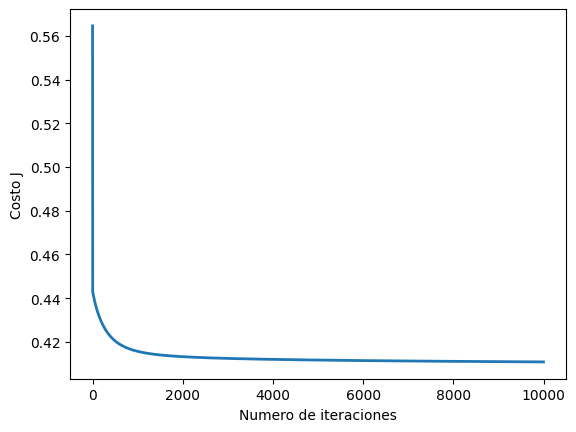

In [26]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.0001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(16)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1,0.,56.,1.,1.,9.,1.,0.,1.,0.,285.,165.,115.,24.25,72.,116.]

aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"(usando el descenso por el gradiente):{aprueba}")

if aprueba > 0.5: print('Existe mas del 50% de probabilidad')
else: print('Las posibilidades son muy bajas')